# EXAM 2020

## Import packages

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Linear regression

In [2]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

In [3]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

## Question 1

In [4]:
N= 10000

#a. Reshaping the vectors
x1r = x1.reshape((N,1))
x2r = x2.reshape((N,1))
tr = np.ones((N,1))

#b. Creating the X matrix
X = np.hstack((tr,x1r,x2r))

#c. Calculating the vector 
β_hat = np.linalg.solve(X.T @ X, X.T @ y)

#d. Printing out the results from the 3 x 1 vector β_hat vector
print(f'β_0 = {β_hat[0]:.3}')
print(f'β_1 = {β_hat[1]:.3}')
print(f'β_2 = {β_hat[2]:.3}')

β_0 = 0.0957
β_1 = 0.293
β_2 = 0.503


So, the vectr of betas obtained through matrix calculation is $\beta_0 = 0.096$, $\beta_1= 0,29$ and $\beta_2=0,5$.

## Question 2 

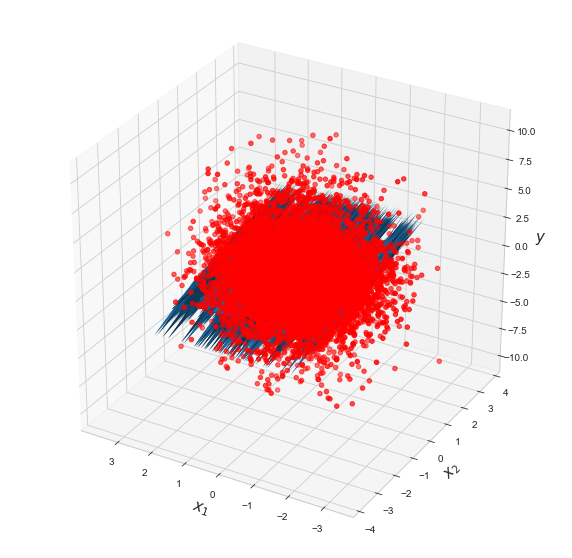

In [5]:
#a. Creating vector of predicted values
y_pvec = β_hat[0]*tr + β_hat[1]*x1 + β_hat[2]*x2

#b. Creating grid 
x1_grid,x2_grid=np.meshgrid(x1, x2, indexing='ij')

#c. Creating scatter plot
fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(x1, x2, y, color='red')
cs= ax.plot_surface(x1_grid,x2_grid,y_pvec)
ax.set_xlabel('$x_1$', fontsize = 15)
ax.set_ylabel('$x_2$', fontsize =15)
ax.set_zlabel('$y$', fontsize =15)
ax.invert_xaxis()
ax.legend
plt.show()

### Question 3

In [6]:
def ols(ols_parameters, x1, x2, y):
    
    beta_0ols, beta_1ols, beta_2ols = ols_parameters 
    return np.sum((y -(beta_0ols + beta_1ols*x1 + beta_2ols*x2))**2)

x0ols = [1, 1, 1]
result_ols = optimize.minimize(ols, x0ols, args = (x1,x2,y))

ols_parameters = result_ols.x

print(f'β_0_ols = {ols_parameters[0]:.3}')
print(f'β_1_ols = {ols_parameters[1]:.3}')
print(f'β_2_ols = {ols_parameters[2]:.3}')



β_0_ols = 0.0957
β_1_ols = 0.293
β_2_ols = 0.503


The result a similar to those in question 1 so we consider the results possibly correct.

### Question 4

In [7]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

def lad(lad_parameters, x1, x2, y):

    beta_0lad, beta_1lad, beta_2lad = lad_parameters
    return np.sum(np.abs(y -(beta_0lad + beta_1lad*x1 + beta_2lad*x2)))

x0lad = [1, 1, 1]
result_lad = optimize.minimize(lad, x0lad, args = (x1,x2,y))

lad_parameters = result_lad.x


print(f'β_0_lad = {lad_parameters[0]:.3}')
print(f'β_1_lad = {lad_parameters[1]:.3}')
print(f'β_2_lad = {lad_parameters[2]:.3}')

β_0_lad = 0.0923
β_1_lad = 0.307
β_2_lad = 0.512


### Question 4

In [8]:
N = 50
k = 5000

In [9]:
np.random.seed(2000)
x1,x2,y = DGP(10000)

def lad(lad_parameters, x1, x2, y):

    beta_0lad, beta_1lad, beta_2lad = lad_parameters
    
    return np.sum(np.abs(y -(beta_0lad + beta_1lad*x1 + beta_2lad*x2)))

def lad_optimizer(lad):
    
    x0lad = [1, 1, 1]
    result_lad = optimize.minimize(lad, x0lad, args = (x1,x2,y))
    lad_parameters = result_lad.x
    
    return lad_parameters

print(f'β_0_lad = {lad_parameters[0]:.3}')
print(f'β_1_lad = {lad_parameters[1]:.3}')
print(f'β_2_lad = {lad_parameters[2]:.3}')

β_0_lad = 0.0923
β_1_lad = 0.307
β_2_lad = 0.512


We had a problem coding the loop for generating the K=1000 samples. We tried different ways to cope with it, the main two are the following:

### 1. Method 1

We construct a for loop but we had some kind of error and strange result as you can see. The idea was to fullfil an empty array with the optimal beta obtained from optimizing for each sample. We redifine the function for the LAD method to try to solve this way (done above) 

In [10]:
def dont_work(N, lad, lad_optimizer, DGP, k):
    
    beta_0_vec = np.empty(k) 
    beta_1_vec = np.empty(k)
    beta_2_vec = np.empty(k)
    
    for i in range(0, k):
        x1k, x2k, yk = DGP(N)
        lad(lad_parameters, x1k, x2k, yk)
        lad_optimizer(lad)
    
    beta_0_vec[i] = lad_parameters[0]
    beta_1_vec[i] = lad_parameters[1]
    beta_2_vec[i] = lad_parameters[2]

    return  beta_0_vec, beta_1_vec, beta_2_vec

beta_0_vec

### 2. Method 2

We though we can solve the problem by firstly create a list of sample obtained from running the DGP multiple times. Then the idea was to trnsform the list in an array an try to  generate a loop through the list. Unfortunately we didn't have enough time to practice with it.

In [11]:
N=50
k=5000

#a. 5000 samples from DGP data generating process

sample_list = []

for i in range(k): # 5000 times  
    rand_list = DGP(N)
    # generates a list of 5000 elements 
    sample_list.append(rand_list) 

len(sample_list)

array1= np.array(sample_list)

In any case, after having realized the histograms, we would have chosen the method with the least volatility. Dispersion (volatility) would be represented by how far are the bars spread near the mean value. In our intention, we wanted to plot a single graph for every beta and to confront each of them separately.

## Durable purchases

In [12]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
chi = 0.9
r = 0.04
Delta = 0.25

#b. Defining solver for period 2
def solve_period_2(alpha, rho, chi, Delta):
    
    #I. grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,5,100)
    v2_grid = np.empty((100,100))
    c_grid = np.empty((100,100))

    
    #II. solve for each m2 in grid
    for i, m2 in enumerate(m2_vec):
        for j, d2 in enumerate(d_vec):
            
            #i.objective
            obj = lambda c: -v2(c, d2, m2, alpha, rho, chi)
            
            #ii. initial value
            x0 = m2/2
            
            #iii. optimizer
            result = optimize.minimize_scalar(obj, x0, method='bounded', bounds=[1e-8,m2])
            
            #iv. save
            v2_grid[i,j] = -result.fun
            c_grid[i,j] = result.x
    
    return m2_vec, d_vec, v2_grid, c_grid

### Question 1

Before plotting $v_2(m_2,d)$, $c^{*}(m_2,d)$ and $x^{*}(m_2,d)$, we are going to define some important functions.

In [13]:
#a. Defining value function of period 2
def v2(c, d2, m2, alpha, rho, chi):
    return (((c**alpha)*(d2+chi*(m2-c))**(1-alpha))**(1-rho))/(1-rho)


#b. Defining value function of period 1
def v1(d1, m1, beta, r, Delta, v2_interp):
    
    # I. expected v2 value
    Ra = (1+r)*(m1-d1)
    v2 = 0
    y2s = [1-Delta, 1, 1+Delta]
    probs = [1/3,1/3,1/3]
    for y2, prob in zip(y2s,probs):
        m2 = Ra + y2
        v2 += prob*v2_interp([m2,d1])[0]
        
    # II. total value
    return beta*v2 

#c. Defining solver for period 2
def solve_period_2(alpha, rho, chi, Delta):
    
    #I. grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,5,100)
    v2_grid = np.empty((100,100))
    c_grid = np.empty((100,100))

    
    #II. solve for each m2 in grid
    for i, m2 in enumerate(m2_vec):
        for j, d2 in enumerate(d_vec):
            
            #i.objective
            obj = lambda c: -v2(c, d2, m2, alpha, rho, chi)
            
            #ii. initial value
            x0 = m2/2
            
            #iii. optimizer
            result = optimize.minimize_scalar(obj, x0, method='bounded', bounds=[1e-8,m2])
            
            #iv. save
            v2_grid[i,j] = -result.fun
            c_grid[i,j] = result.x
    
    return m2_vec, d_vec, v2_grid, c_grid

We are now going to plot $c^{*}(m_2,d)$, $v_2(m_2,d)$ and $x^{*}(m_2,d)$.

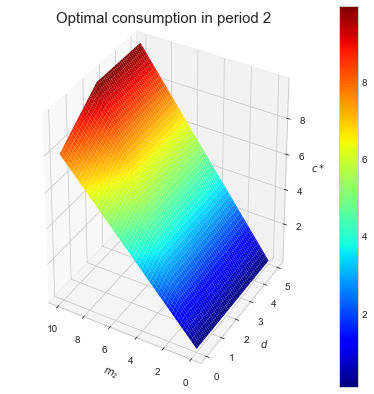

In [14]:
#d. Solving for optimal m2, v2 and c
m2_vec,d_vec,v2_grid,c_grid = solve_period_2(alpha, rho, chi, Delta)

#e. Grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

#f. Plotting c*(m2,v2)
fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,c_grid,cmap=cm.jet)
ax.set_title('Optimal consumption in period 2', fontsize =15, pad =15)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$c*$')
ax.invert_xaxis()
fig1.colorbar(cs)

plt.show()

From the 3D graph above, we can see that the optimal choice of $d*$ is rising for $m_2$ taking.

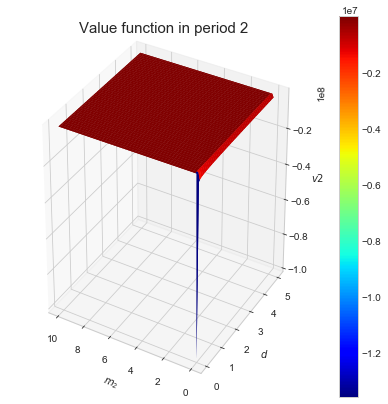

In [15]:
#g. Plotting v2(m2,d2)
fig2 = plt.figure(figsize=(7,7))
ax = fig2.add_subplot(1,1,1,projection='3d')       
cs1 = ax.plot_surface(m2_grid,d_grid,v2_grid,cmap=cm.jet)
ax.set_title('Value function in period 2', fontsize = 15, pad =15)
cs = ax.plot_surface(m2_grid,d_grid,v2_grid,cmap=cm.jet)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$v2$')
ax.invert_xaxis()
fig2.colorbar(cs)

plt.show()

As we see from the 3D graph above, household's value of having m2 is close to zero for all values of $m_2$ and d, with the exception of the latter two being equal to zero. In this particular case, consumer's value of having cash-on-hand is negative at the beginning of period 2.

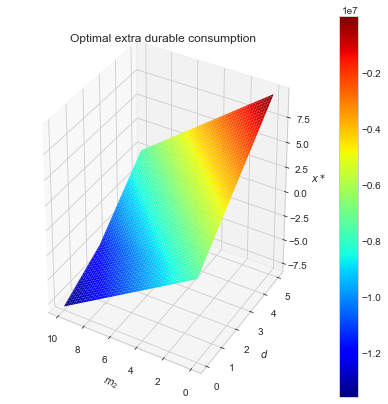

In [16]:
#h. Defining extra durable consumption
ix_grid = m2_vec - c_grid

#i. Plotting v2(m2,d2)
fig3 = plt.figure(figsize=(7,7))
ax = fig3.add_subplot(1,1,1,projection='3d')       
cs1 = ax.plot_surface(m2_grid,d_grid,ix_grid,cmap=cm.jet)
ax.set_title('Optimal extra durable consumption')
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$x*$')
ax.invert_xaxis()
fig3.colorbar(cs)
plt.show()

As we can notice from the 3D graph, utility increases for higher values of $x*$. There is also positive relationship between extra durable consumption and cash on hand($m_2$).

### Question 2

First of all, we construct the interpolator using the *interpolate.RegularGridInterpolator* as given in the exercise. Secondly, we solve the maximization problem for the first period through the function *solve_period_1*.

In [17]:
#a. Constructing interpolator
v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec], v2_grid,
                                                bounds_error=False,fill_value=None)


#b. Defining a function for finding the optimal consumption of durable goods and the value function for period 1 
def solve_period_1(rho, beta, r, Delta, v1, v2_interp):

    # I. grids
    m1_vec = np.linspace(1e-8,10,100)
    v1_vec = np.empty(100)
    d1_vec = np.empty(100)
    
    # II. solve for each m1 in grid
    for i, m1 in enumerate(m1_vec):
        
        # i. objective
        obj = lambda d1: -v1(d1, m1, beta, r, Delta, v2_interp)
        
        # ii. initial guess (consume half)
        d0 = m1*1/3
        
        # iii. optimize
        result1 = optimize.minimize_scalar(obj, d0 ,method='bounded', bounds=[1e-8, m1])
        
        # iv. save
        v1_vec[i] = -result1.fun
        d1_vec[i] = result1.x
     
    return m1_vec, v1_vec, d1_vec

We can now solve the first period optimization problem and we plot $c^{*}(m_1)$ and $v_1(m_1)$.

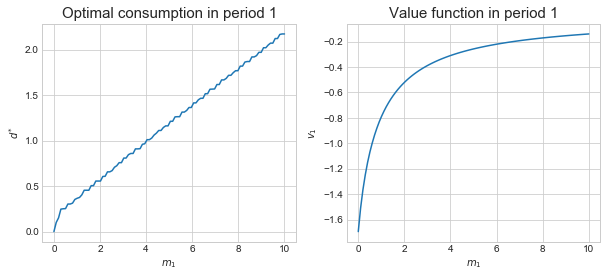

In [18]:
#c. Solve period 1
m1_vec, v1_vec, d1_vec = solve_period_1(rho, beta, r, Delta, v1, v2_interp)

#d. Plotting d and v1
fig3 = plt.figure(figsize=(10,4))

#d.1. Plot optimal durable consumption with respect to m1
ax = fig3.add_subplot(1,2,1)
ax.plot(m1_vec, d1_vec)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$d^{*}$')
ax.set_title('Optimal consumption in period 1', fontsize = 15)

#d.2. Plot value function v1
ax = fig3.add_subplot(1,2,2)
ax.plot(m1_vec, v1_vec)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$v_1$')
ax.set_title('Value function in period 1', fontsize =15)

plt.show()

The results we obtain are reasonable. Optimal choice of durable consumption is increasing in cash on hand in the period 1. The value function has a similar behaviour as the value function for period 2 seen above in *question 1*. Value function is approaching zero moving along the increasing values of $m_1$. When the latter one is close to zero, then value function is negative.

### Question 3

As for period 1 with respect to period 2, we are going to construct the interpolator with respect to period 1. Then we define asset $a$ in the two different cases of $z=0$ (stick to the original level of durable consumption) and $z=1$ (adjust its stock of durables).

In [19]:
Lambda = 0.2

#a. Constructing interpolator
v1_interp = interpolate.RegularGridInterpolator((m1_vec,), v1_vec,
                                                bounds_error=False,fill_value=None)

#b. Defining asset in period 1 due to the choice between adjusting or not
def asset(z, m0, d0, Lambda):
    """ 
    Args:
        m0 (float): cash on hand
        d0 (float): durable consumption
        Lambda (float): proportional loss
        
    Returns:
        (float): cash on hand
    """
    
    if z == 1:
        return m0 + (1-Lambda)*d0 -d0
    
    else:
        return m0 - d0

#c. Defining value function at time 0
def v0(z, d0, m0, r, Lambda, Delta, v1_interp):
    
    a = asset(z, m0, d0, Lambda)
    
    # I. expected v1 value
    Ra1 = (1+r)*(a)
    v1 = 0
    y1s = [1-Delta, 1, 1+Delta]
    probs1 = [1/3,1/3,1/3]
    for y1, prob in zip(y1s,probs1):
        m1 = Ra1 + y1
        v1 += prob*v1_interp([m1,d0])[0]
    
    
    
    return beta*v1

In [20]:
#d. Defining function for olving optimization problem for period 0
def solve(m0_vec, d0_vec, obj_func):
    
    """ solve for optimal zeta choice
    
    Args:
        
        m0_vec (ndarray): cash-on-hand vector in period 0
        d0_vec (ndarray): durable consumption vector in period 0
        obj_func (callable): objective function
    
    Returns:
    
        z_vec (ndarray): change choices
        v0_vec (ndarray): implied values-of-choices
    
    """

    # I. grids
    v0_grid = np.empty((m0_vec.size, d0_vec.size))
    z_grid = np.empty((m0_vec.size, d0_vec.size))
    
    # II. solve for each m0, d0 in grid
    for i, m0 in enumerate(m0_vec):
        for j, d0 in enumerate(d0_vec):

            # i. values of choices
            v_nozeta = obj_func(0,m0,d0)
            v_zeta = obj_func(1,m0,d0)
        
            # ii. maximum
            if v_nozeta > v_zeta:
                v0_grid[i,j] = v_nozeta
                z_grid[i,j] = 0
            else:
                v0_grid[i,j] = v_zeta
                z_grid[i,j] = 1
            
    return z_grid, v0_grid

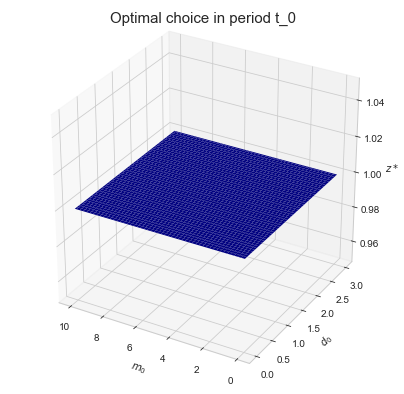

In [21]:
m0_vec = np.linspace(1e-8, 10, 100)
d0_vec = np.linspace(1e-8, 3, 100)

#e. Solving maximization problem for period 0
obj_func = lambda z, d0, m0 : v0(z, d0, m0, r, Lambda, Delta, v1_interp)
z_grids, v0_grids = solve(m0_vec, d0_vec, obj_func)

#f. grids
m0_grid, d0_grid = np.meshgrid(m0_vec,d0_vec,indexing='ij')

#g. plotting z*(m0,v0)
fig4 = plt.figure(figsize=(7,7))
ax = fig4.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(m0_grid,d0_grid,z_grids,cmap=cm.jet)
ax.set_title('Optimal choice in period t_0', fontsize = 15, pad=15)
ax.set_xlabel('$m_0$')
ax.set_ylabel('$d_0$')
ax.set_zlabel('$z*$')
ax.invert_xaxis()

We have obtain a strange result in our opinion. Probably, as the choice to adjust durable consumption implies a loss, we expected the optimal behavior to be z=0 but we obtain exactly the contrary. It seems that for all the interval of values, our household is going to adjust. Probably we made an error in the code.

## Question 3

In [22]:
def gradient_descent(f, x0, epsilon=1e-6, Theta=0.1, Delta=1e-8, max_iter=10000):    
    
    """ minimize function with Gradient_descent' algorithm  
    
    Args:

        f (callable): function
        x0 (np.ndarray): initial values
        epsilon (float): tolerance
        Theta (float): scale factor
        Delta (float): small number
        max_iter (int): maximum number of iterations
        
    """
    # step 1: initialize
    x = x0
    n = 1
    
    # step 2-6: iteration
    while n < max_iter:
        
        # step 2: compute function values and derivative
        x_prev = x
        fx = f(x_prev)
        
        # step 3: evaluate gradient
        fp = (f(x_prev + Delta) - fx)/Delta
        
        # step 4
        if np.max(np.abs(fp)) < epsilon:
            break
        
        # step 5-6
        theta = Theta
        fn = f(x_prev - theta*fp)
        
        # step 7-9
        if fn < f(x):
            x = x_prev - theta*fp
        
        # step 9
        theta = theta/2
        fn = f(x - theta*fp)
            
        # d. update i
        n += 1
        
    return x, n

In [23]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])

try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0000,1.0000) after 15 iterations


We have achieved the minimum at (1,1) with a number of 15 iterations.